## Stock Prediction using LSTM

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#Import Libraries

In [59]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
path1 = "/train_data.csv"
path2 = "/test_data.csv"

In [61]:
#Load the Training Dataset

In [62]:
dataset_train = pd.read_csv(path1)
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [63]:
#The Open Stock Price Column used to Train Your Model

In [64]:
training_set = dataset_train.iloc[:,1:2].values

In [65]:
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [66]:
#Normalizing the Dataset

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [68]:
#split dataset into X_train and y_train

In [69]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [70]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [71]:
#Reshaping the Data

In [72]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [73]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [74]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout (0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout (0.2))
regressor.add(Dense (units=1))


In [75]:
#Fitting the Model

In [76]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 194ms/step - loss: 0.0374
Epoch 2/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 7s 189ms/step - loss: 0.0063
Epoch 4/100
38/38 [==============================] - 9s 243ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 7s 179ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0059
Epoch 11/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0038
Epoch 13/100

In [77]:
#Extracting the Actual Stock Prices

In [78]:
dataset_test = pd.read_csv(path2)
actual_stock_price =  dataset_test.iloc[:,1:2].values

In [79]:
#Preparing the model

In [80]:
dataset_total = pd.concat((dataset_train [ 'Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [104]:
X_test = []
for i in range(60,310):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [94]:
#Prediction

In [105]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 [==============================] - 0s 37ms/step


In [87]:
#Plotting the Actual and Predicted Prices

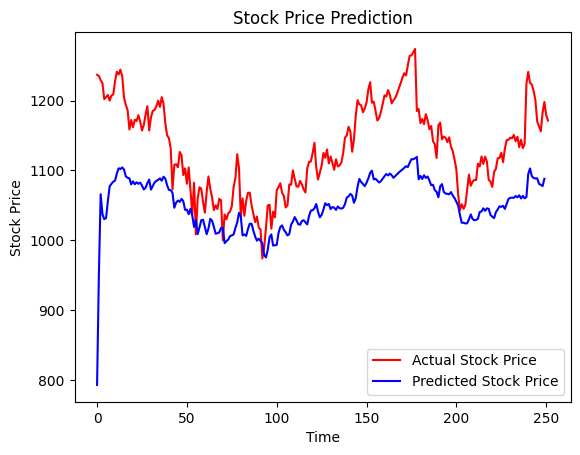

In [106]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()